# Naive Bayes: Strengths and Weaknesses

## 1. Learning Goals

By the end of this notebook, you will be able to:

- **Understand how Naive Bayes classifiers make predictions using probability and Bayes' theorem**  
  You'll explore how the algorithm assumes feature independence and uses prior and likelihood estimates for classification.

- **Apply Naive Bayes to different datasets**  
  You'll test it on clean versus noisy or non-independent data to evaluate its assumptions in practice.

- **Measure model performance with accuracy and visualizations**  
  You'll use standard metrics to compare outcomes and gain deeper insight into when Naive Bayes is reliable.

- **Recognize when Naive Bayes works well—and when it breaks down**  
  You'll observe the trade-offs in speed, simplicity, and assumptions about feature independence.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import time

In [2]:
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBBBFF']), alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

## 2. Naive Bayes on Clean, Independent Features

In this first experiment, we’ll generate a synthetic dataset with two informative features that are conditionally independent given the class label. This aligns well with the assumptions made by Naive Bayes, so we expect the model to perform well.

We’ll fit a Gaussian Naive Bayes model to the training data and then visualize its decision boundary and confusion matrix on the test set.

Pay attention to how neatly it separates the two classes and how confident its predictions are.

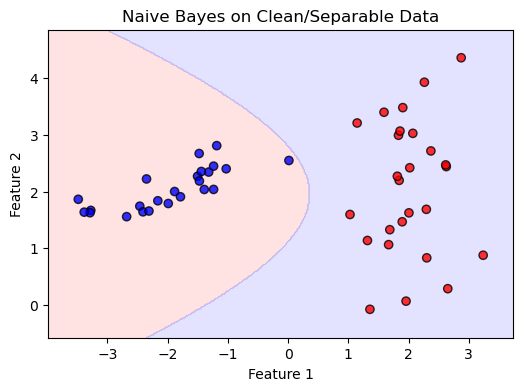

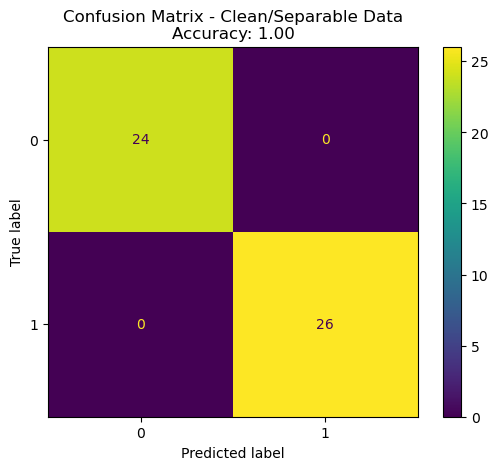

In [3]:
# Generate linearly separable data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=2.0, random_state=0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot decision boundary with true labels
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(model, X_test, y_pred, ax, "Naive Bayes on Clean/Separable Data")
plt.show()

# Show accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title(f"Confusion Matrix - Clean/Separable Data\nAccuracy: {acc:.2f}")
plt.show()

✅ **Strength**: Naive Bayes works very well on datasets that satisfy the feature independence assumption. It is fast, interpretable, and provides solid baseline performance in many cases.

## 3. Naive Bayes on Correlated or Noisy Features

Now let’s evaluate Naive Bayes on a more challenging dataset.

Here, the features are not independent—one is a redundant version of the other, and the data has overlapping class boundaries.

This violates the core assumption of Naive Bayes and may cause the model to misestimate class probabilities. We’ll train the model again and inspect how the predictions and decision boundaries are affected.

Expect to see lower accuracy and a more ambiguous classification boundary.

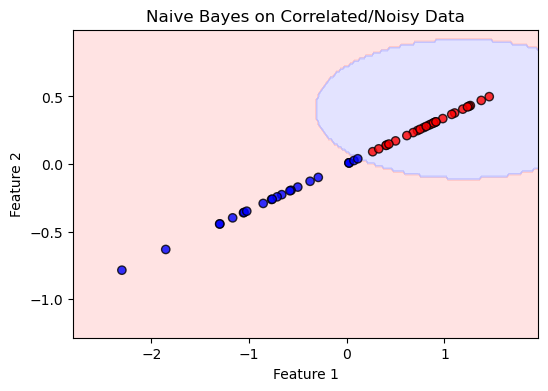

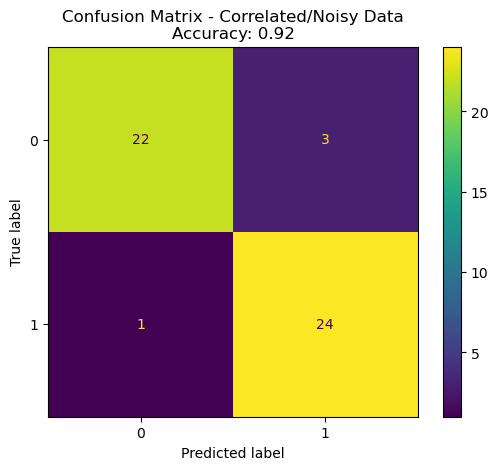

In [4]:
# Generate data with correlated features and some noise
X_corr, y_corr = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=1,
                                     n_clusters_per_class=1, class_sep=0.8, random_state=1)

# Split the data
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.25, random_state=42)

# Train Gaussian Naive Bayes model
model_corr = GaussianNB()
model_corr.fit(X_train_corr, y_train_corr)
y_pred_corr = model_corr.predict(X_test_corr)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(model_corr, X_test_corr, y_pred_corr, ax, "Naive Bayes on Correlated/Noisy Data")
plt.show()

# Show accuracy and confusion matrix
acc_corr = accuracy_score(y_test_corr, y_pred_corr)
disp_corr = ConfusionMatrixDisplay.from_estimator(model_corr, X_test_corr, y_test_corr)
plt.title(f"Confusion Matrix - Correlated/Noisy Data\nAccuracy: {acc_corr:.2f}")
plt.show()

⚠️ **Weakness**: Naive Bayes can struggle when the feature independence assumption is violated. Correlated or redundant features can confuse the model, reducing accuracy and robustness.

## 5. Extended Strength Demonstration: Irrelevant and High-Dimensional Features

In this final experiment, we take a closer look at two practical strengths of the Naive Bayes algorithm by testing it on a dataset with a large number of features — many of which are irrelevant.

This test helps us confirm the following:

- **Naive Bayes handles high-dimensional datasets well**: Even when the number of features is large, Naive Bayes remains computationally efficient.
- **Naive Bayes is robust to irrelevant features**: Many machine learning algorithms degrade in performance when given noisy or irrelevant features. Naive Bayes, on the other hand, continues to perform reasonably well, thanks to its strong independence assumptions.

We will generate synthetic data with 100 total features, but only 2 of them actually carry information relevant to the target label. We'll then evaluate how well the model performs.

Training time: 0.0022 seconds


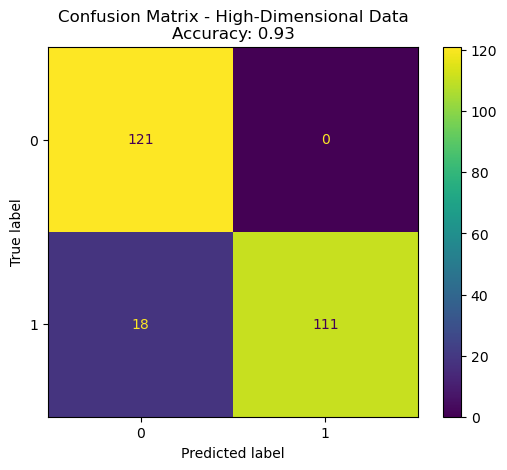

In [9]:
# Generate high-dimensional data
X_highdim, y_highdim = make_classification(
    n_samples=1000, n_features=100, 
    n_informative=2, n_redundant=10,
    n_clusters_per_class=1, random_state=42
)

# Train/test split
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(
    X_highdim, y_highdim, test_size=0.25, random_state=42
)

# Train the Naive Bayes model
start_time = time.time()
model_hd = GaussianNB()
model_hd.fit(X_train_hd, y_train_hd)
train_time = time.time() - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predict and evaluate
y_pred_hd = model_hd.predict(X_test_hd)
acc_hd = accuracy_score(y_test_hd, y_pred_hd)

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_hd, X_test_hd, y_test_hd)
plt.title(f"Confusion Matrix - High-Dimensional Data\nAccuracy: {acc_hd:.2f}")
plt.show()

**✅ Strength:** Naive Bayes is computationally efficient and robust to irrelevant features, making it suitable for high-dimensional datasets. It can still provide reasonable performance even when many features do not contribute to the classification task.

## 4. Summary and Reflection

In this notebook, you experimented with Naive Bayes classifiers under ideal and non-ideal conditions. You saw how the independence assumption impacts performance, and where the simplicity of the model shines or breaks down.

Naive Bayes is popular for its speed and simplicity, especially in text classification or spam detection tasks. However, it may underperform when features are highly correlated or when modeling complex boundaries is necessary.

---

📝 **Reflection Question**:

Which of the following best describes a limitation of Naive Bayes?

A. It cannot be used for binary classification  
B. It is too complex to interpret  
C. It assumes feature independence, which may not hold in real data  
D. It requires deep neural networks to train

✅ Choose the best answer and briefly explain why.
